In [1]:
%matplotlib inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import geopandas as gpd
from fiona.crs import from_epsg
import shapely
from geopandas.tools import overlay

## City Boundary (2010)

In [2]:
url = "http://gisdata.scag.ca.gov/Lists/GISData/Attachments/11/" \
      "city_boundary_scag_2010.zip"

os.system("curl -O " + url)
os.system("mv " + "city_boundary_scag_2010.zip " + os.getenv("OPSDATA"))
os.system("unzip " + os.getenv("OPSDATA") + 
          "/city_boundary_scag_2010.zip -d " + 
          os.getenv("OPSDATA") + "/city_boundary")

0

[The crs used in SCAG](http://gisdata.scag.ca.gov/Pages/Forums.aspx) is Universal Transverse Mercator (UTM), Zone 11N, NAD83. All units are measured in meters. Its corresponding [EPSG:26911](http://spatialreference.org/ref/epsg/nad83-utm-zone-11n/)

In [3]:
city = gpd.read_file(os.getenv("OPSDATA") + "/city_boundary" + 
                     "/city_boundary_scag_2010.shp")
city = gpd.GeoDataFrame(city)
city.crs = from_epsg(26911)
city = city.to_crs(epsg=4326)
city.head()

,CITY,CITY_ID,AREA_,PERIMETER,ACRES,X_CENTER,Y_CENTER,COUNTY,Shape_area,Shape_len,geometry
0,Agoura Hills,394,2.024535e+07,24496.99983,5002.71608,337665.76111,3.780300e+06,Los Angeles,2.024535e+07,24496.999825,POLYGON Z ((-118.7198093947557 34.136280069224...
1,Alhambra,884,1.975647e+07,21039.72920,4881.90980,395239.24428,3.772047e+06,Los Angeles,1.975647e+07,21039.729200,POLYGON Z ((-118.1236516319292 34.106767318014...
2,Arcadia,2462,2.875722e+07,40365.69336,7106.03511,404356.76723,3.777520e+06,Los Angeles,2.875722e+07,40365.693363,POLYGON Z ((-118.0214006636942 34.179437690225...
3,Artesia,2896,4.203547e+06,12485.76722,1038.71488,400050.85307,3.747997e+06,Los Angeles,4.203547e+06,12485.767218,POLYGON Z ((-118.0749195743415 33.880380709635...
4,Avalon,3274,7.124962e+06,16464.08288,1760.60939,376269.98352,3.689309e+06,Los Angeles,7.124962e+06,16464.082878,POLYGON Z ((-118.3256187690215 33.322026898660...


In [4]:
city.shape

(191, 11)

In [5]:
city.drop(['AREA_', 'PERIMETER', 'ACRES', 'X_CENTER', 'Y_CENTER', 
            'Shape_area', 'Shape_len'], axis=1, inplace=True)

In [6]:
city.CITY.unique()

array(['Agoura Hills', 'Alhambra', 'Arcadia', 'Artesia', 'Avalon', 'Azusa',
       'Baldwin Park', 'Bell', 'Bell Gardens', 'Bellflower',
       'Beverly Hills', 'Bradbury', 'Burbank', 'Calabasas', 'Carson',
       'Cerritos', 'Claremont', 'Commerce', 'Compton', 'Covina', 'Cudahy',
       'Culver City', 'Diamond Bar', 'Downey', 'Duarte', 'El  Monte',
       'El Segundo', 'Gardena', 'Glendale', 'Glendora', 'Hawaiian Gardens',
       'Hawthorne', 'Hermosa Beach', 'Hidden Hills', 'Huntington Park',
       'Industry', 'Inglewood', 'Irwindale', 'La Canada Flintridge',
       'La Habra Heights', 'La Mirada', 'La Puente', 'La Verne',
       'Lakewood', 'Lancaster', 'Lawndale', 'Lomita', 'Long Beach',
       'Los Angeles', 'Lynwood', 'Malibu', 'Manhattan Beach', 'Maywood',
       'Monrovia', 'Montebello', 'Monterey Park', 'Norwalk', 'Palmdale',
       'Palos Verdes Estates', 'Paramount', 'Pasadena', 'Pico Rivera',
       'Pomona', 'Rancho Palos Verdes', 'Redondo Beach', 'Rolling Hills',
       

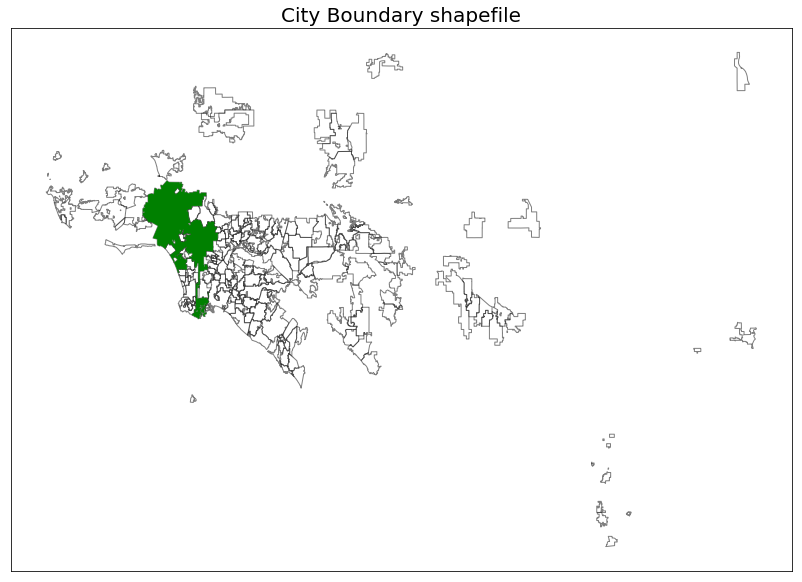

In [7]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
city.plot(ax=ax, color="white", edgecolor="k", lw=1, alpha=0.5)
city[city.CITY == 'Los Angeles'].plot(ax=ax, color='g')
plt.title('City Boundary shapefile', fontsize=20)
plt.show()

## LA City Community Boundaries

In [8]:
url = "http://egis3.lacounty.gov/dataportal/wp-content/uploads/2015/09/" \
      "LACITY_COMMUNITIES.zip"

os.system("curl -O " + url)
os.system("mv " + "LACITY_COMMUNITIES.zip " + os.getenv("OPSDATA"))
os.system("unzip " + os.getenv("OPSDATA") + 
          "/LACITY_COMMUNITIES.zip -d " + 
          os.getenv("OPSDATA") + "/LACITY_COMMUNITIES")

0

[The crs used in egis3.lacounty.gov](https://egis3.lacounty.gov/dataportal/lariac/lariac-archives/lariac1-archive/lariac1-downloads/) is CA State Plane Coordinate System, NAD 83, Zone V, US Survey Feet. Its corresponding [EPSG:2229](http://spatialreference.org/ref/epsg/2229/)

In [9]:
communities = gpd.read_file(os.getenv("OPSDATA") + "/LACITY_COMMUNITIES" + 
                     "/LACITY_COMMUNITIES.shp")
communities = gpd.GeoDataFrame(communities)
communities.crs = from_epsg(2229)
communities = communities.to_crs(epsg=4326)
communities.head()

,COMTY_NAME,CERT,Shape_STAr,Shape_STLe,geometry
0,SYLMAR,yes,3.404014e+08,111633.753407,"POLYGON ((-118.5065388623965 34.335232291754, ..."
1,GRANADA HILLS,yes,4.264128e+08,89564.685903,POLYGON ((-118.5421754250533 34.29859859087502...
2,SAN FERNANDO,,6.606178e+07,36469.492778,POLYGON ((-118.4174987397847 34.29069085164221...
3,PORTER RANCH,yes,2.267371e+08,73616.951350,POLYGON ((-118.5961717694247 34.27461245509571...
4,LAKEVIEW TERRACE,yes,1.448471e+08,75477.956189,POLYGON ((-118.4083283019408 34.28670161032178...


In [10]:
communities.drop(['CERT', 'Shape_STAr', 'Shape_STLe'], axis=1, inplace=True)

In [11]:
communities.shape

(154, 2)

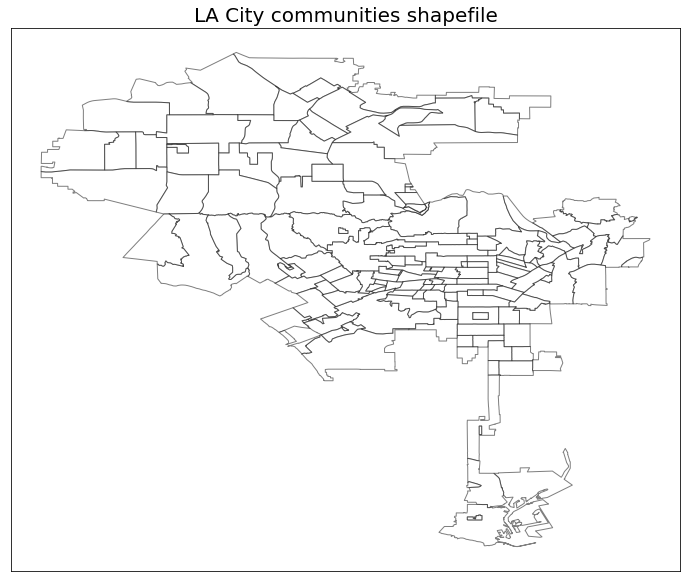

In [12]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
communities.plot(ax=ax, color="white", edgecolor="k", lw=1, alpha=0.5)
plt.title('LA City communities shapefile', fontsize=20)
plt.show()

## Intersect

In [13]:
city.head()

,CITY,CITY_ID,COUNTY,geometry
0,Agoura Hills,394,Los Angeles,POLYGON Z ((-118.7198093947557 34.136280069224...
1,Alhambra,884,Los Angeles,POLYGON Z ((-118.1236516319292 34.106767318014...
2,Arcadia,2462,Los Angeles,POLYGON Z ((-118.0214006636942 34.179437690225...
3,Artesia,2896,Los Angeles,POLYGON Z ((-118.0749195743415 33.880380709635...
4,Avalon,3274,Los Angeles,POLYGON Z ((-118.3256187690215 33.322026898660...


In [14]:
intersect_shp = overlay(city, communities, how="union")
intersect_shp.head(2)

,CITY,CITY_ID,COUNTY,COMTY_NAME,geometry
0,Calexico,9710,Imperial,None,POLYGON Z ((-115.4905953575289 32.708749118709...
1,Holtville,34246,Imperial,None,POLYGON Z ((-115.3635678968022 32.818483693719...


In [15]:
intersect_shp.shape

(2668, 5)

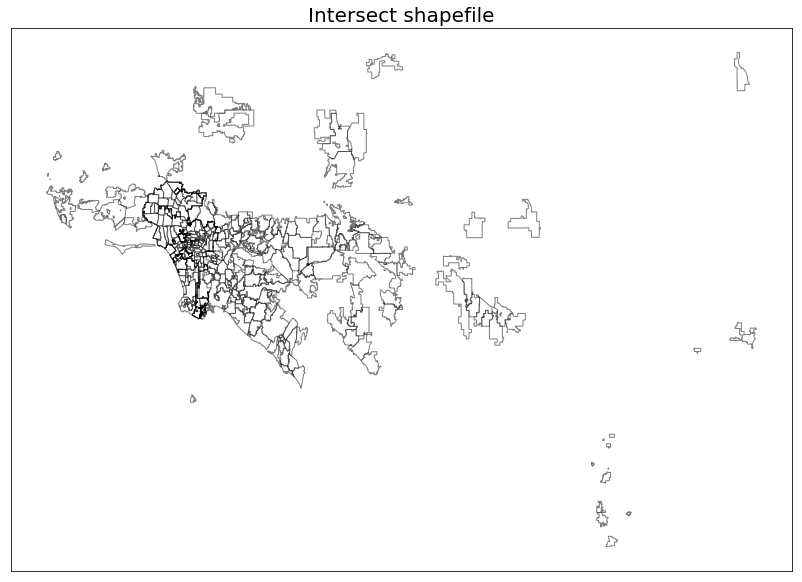

In [16]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
intersect_shp.plot(ax=ax, color="white", edgecolor="k", lw=1, alpha=0.5)
plt.title('Intersect shapefile', fontsize=20)
plt.show()

Based on [some discussion](https://github.com/geopandas/geopandas/pull/429) about geopandas overlay, this function seems not very reliable yet. Maybe we can explore alternatives like sjoin, and using Arcgis or Qgis to test our python function results.